In [18]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans



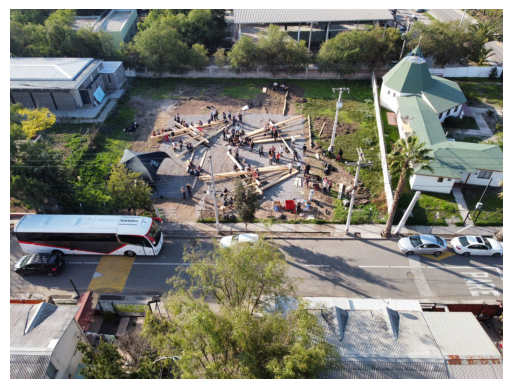

In [19]:
# Ruta relativa a la imagen en la carpeta 'data'
image_path = '../data/Imagen_L2_ML.jpg'  # Ajusta la ruta si es necesario
image = Image.open(image_path)

# Mostrar la imagen
plt.imshow(image)
plt.axis('off')  # No mostrar los ejes
plt.show()


Aplicaremos K-means para reducir la paleta de colores de la imagen y luego proceder con el clustering jerárquico y las mezclas de gaussianas.

### 1) K-means

In [22]:
# Convertir la imagen a un arreglo de píxeles (de RGB a una matriz 2D de valores de color)
image_np = np.array(image)
pixels = image_np.reshape(-1, 3)

# Mostrar la forma original y la forma aplanada de los píxeles
print(f"Forma original de la imagen: {image_np.shape}")
print(f"Forma de la imagen convertida en píxeles: {pixels.shape}")


Forma original de la imagen: (1200, 1600, 3)
Forma de la imagen convertida en píxeles: (1920000, 3)


In [24]:
# Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pixels)

# Obtener los colores (los centroides de los clusters)
centroids = kmeans.cluster_centers_

# Asignar cada píxel a su color más cercano (cluster)
labels = kmeans.labels_

print("Centroides de los clusters (colores dominantes):")
print(centroids)


Centroides de los clusters (colores dominantes):
[[200.10600587 197.32863328 193.33011989]
 [125.3870456  125.09380132 105.25142247]
 [ 51.12549121  55.15613525  49.37701985]]


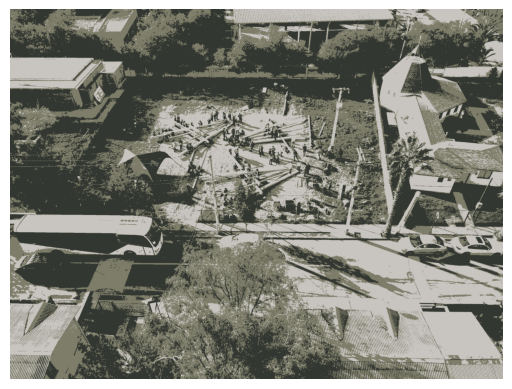

In [26]:
# Convertir los centroides a enteros para representar colores
centroids = np.array(centroids, dtype='uint8')

# Asignar a cada píxel su color correspondiente del cluster
reconstructed_image = centroids[labels].reshape(image_np.shape)

# Mostrar la imagen reconstruida
plt.imshow(reconstructed_image)
plt.axis('off')
plt.show()


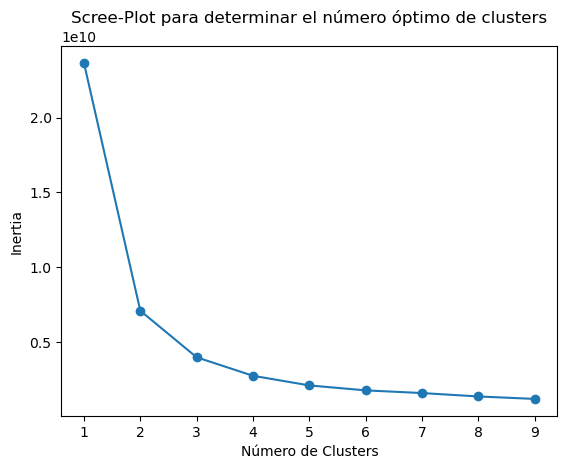

In [28]:
# Probar diferentes números de clusters y calcular la "inertia" (distancia intracluster)
inertia = []
cluster_range = range(1, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    inertia.append(kmeans.inertia_)

# Graficar el scree-plot
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Scree-Plot para determinar el número óptimo de clusters')
plt.show()
